# Ejercitación

Elige uno de los datasets disponibles en Seaborn o el dataset de críticas de vinos del encuentro anterior. Aplica las herramientas vistas de Pandas y de Seaborn para obtener una primera aproximación a las características del conjunto de datos elegido.

In [1]:
# Importamos las librearias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
# sns.set() 

In [3]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [30]:
data = sns.load_dataset('tips')

In [3]:
data.shape, data.head(5)

((244, 7),
    total_bill   tip     sex smoker  day    time  size
 0       16.99  1.01  Female     No  Sun  Dinner     2
 1       10.34  1.66    Male     No  Sun  Dinner     3
 2       21.01  3.50    Male     No  Sun  Dinner     3
 3       23.68  3.31    Male     No  Sun  Dinner     2
 4       24.59  3.61  Female     No  Sun  Dinner     4)

# info del dataset obtenida desde https://www.kaggle.com/ranjeetjain3/seaborn-tips-dataset
1. **total_bill**: Total bill (cost of the meal), including tax, in US dollars
1. **tip**:Tip (gratuity) in US dollars
1. **sec**:Sex of person paying for the meal (0=male, 1=female)
1. **somker** Smoker in party? (0=No, 1=Yes)
1. **day**: 3=Thur, 4=Fri, 5=Sat, 6=Sun
1. **time**: 0=Day, 1=Night
1. **size**: Size of the party

In [37]:
# vision del df
data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [38]:
# Existen datos NA?
data.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

## Datos que podemos obtener hasta el momento
* tenemos 244 registros
* nos existen datos faltantes
* La cuenta media es de 19.80~ dolares (+- 9), la menor es de 3 y la maxima de 50 dolares
* La propina media es de 3~ dolares (+- 1.3), la manor es de 1 y la maxima de 10 dolares
* Cada mesa tiene un promedio de 2.5 (+- 1) personas, con un maximo de 6 persona

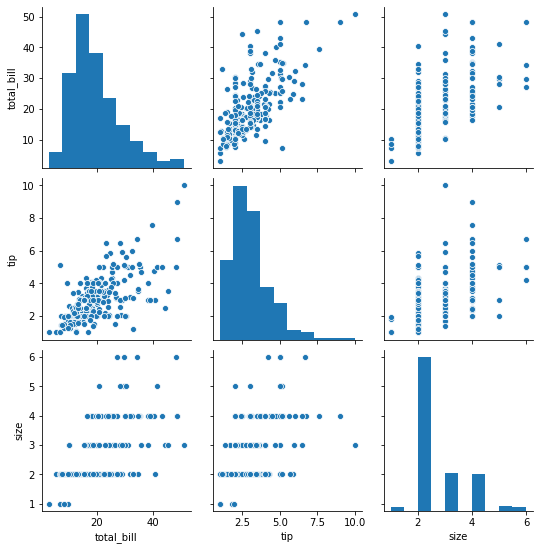

In [39]:
# relacion sin discriminar por caracteristicas 
sns.pairplot(data)

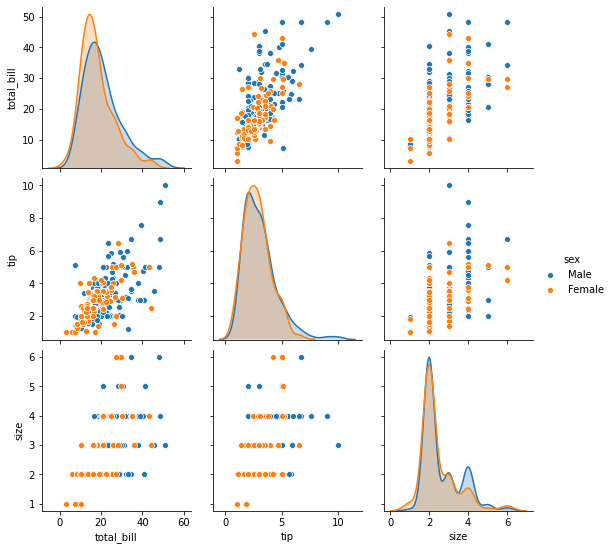

In [14]:
# relacion por sexo
sns.pairplot(data,hue='sex')

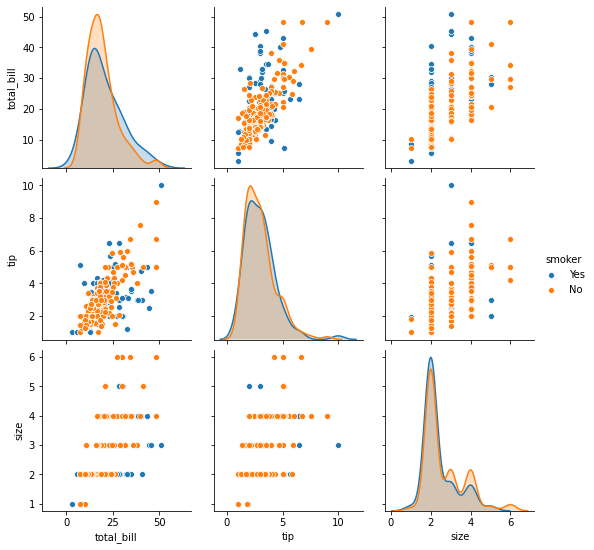

In [15]:
# relacion por fumadores
sns.pairplot(data,hue='smoker')

C:\Anaconda3\envs\acamica\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Anaconda3\envs\acamica\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


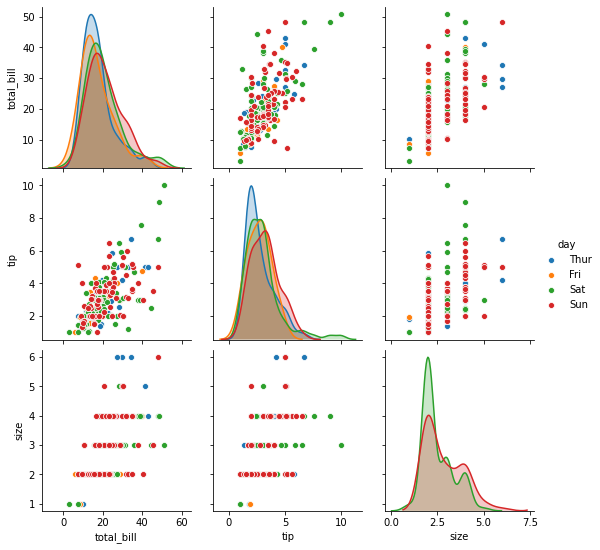

In [17]:
# relacion por día de la semana
sns.pairplot(data,hue='day')

C:\Anaconda3\envs\acamica\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


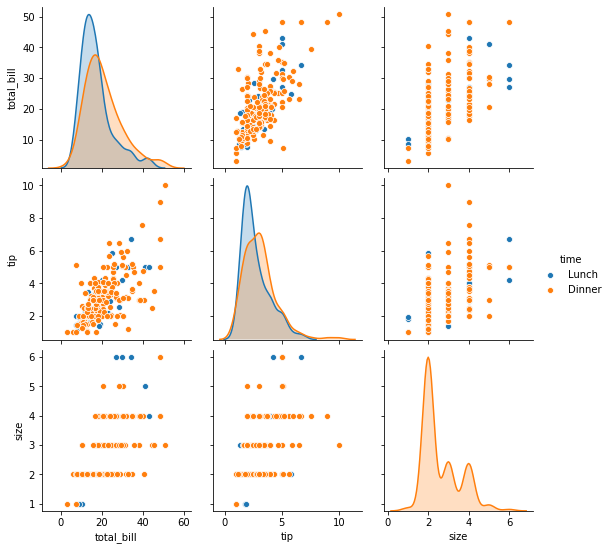

In [21]:
# relacion por almuerza/cena
sns.pairplot(data,hue='time')

In [35]:
data.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


Asumiendo:
* -1,0 A -0,5 o 1,0 a 0,5 **Fuerte**
* -0,5 A -0,3 o 0,3 a 0,5 **Moderada**
* -0,3 A -0,1 o 0,1 a 0,3 **Débil**
* -0,1 A 0,1 **Ninguna o muy débil**
fuente: https://explorable.com/es/la-correlacion-estadistica

Podemos decir que:
* Existe una correlación fuerte entre total_nill y tip y size respectivamente
* Existe una correlación modedata (al limite de fuerte) entre size y tip


<AxesSubplot:xlabel='total_bill', ylabel='tip'>

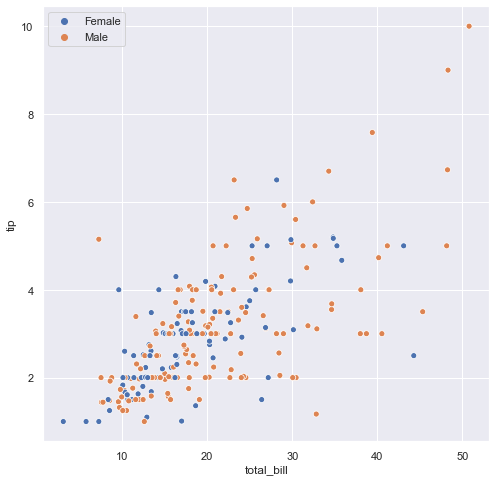

In [10]:
plt.figure(figsize=(8,8))
sns.scatterplot(
    x=data['total_bill'],
    y=data['tip'],
    hue=data['sex'].to_list()
)

<Figure size 720x720 with 0 Axes>

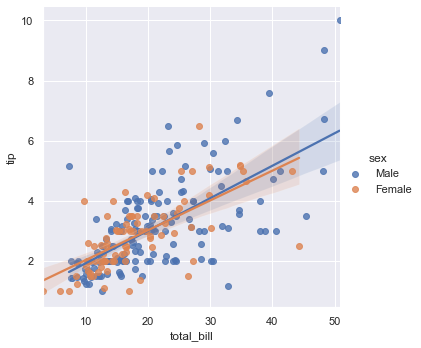

In [16]:
plt.figure(figsize=(10,10))
sns.lmplot(x="total_bill", y="tip", hue="sex", data=data)
               #palette=pal, y_jitter=.02, logistic=True, truncate=False, col="sex")
plt.show()

<Figure size 720x720 with 0 Axes>

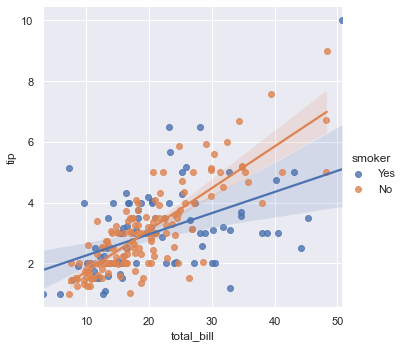

In [17]:
plt.figure(figsize=(10,10))
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=data)
               #palette=pal, y_jitter=.02, logistic=True, truncate=False, col="sex")
plt.show()

<Figure size 720x720 with 0 Axes>

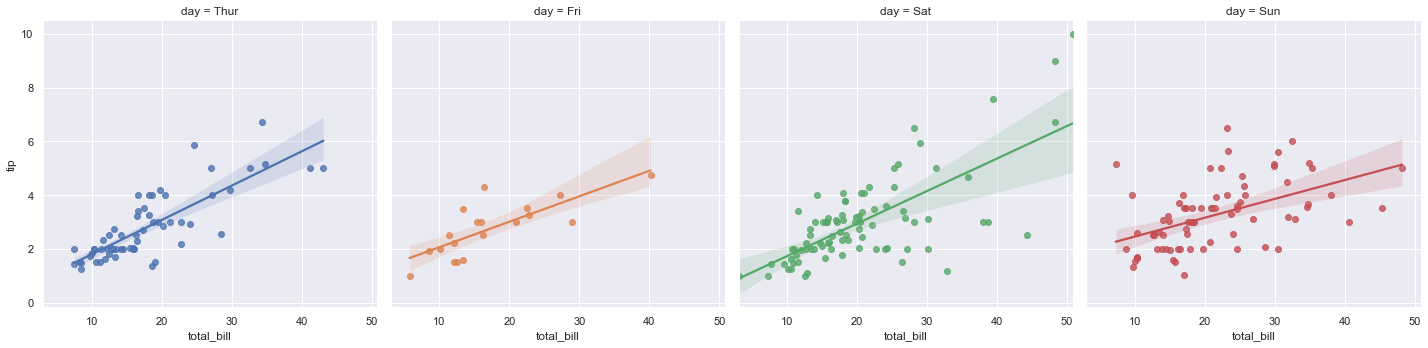

In [19]:
plt.figure(figsize=(10,10))
sns.lmplot(x="total_bill", y="tip", hue="day", col="day", data=data)
               #palette=pal, y_jitter=.02, logistic=True, truncate=False, col="sex")
plt.show()
    

<Figure size 720x720 with 0 Axes>

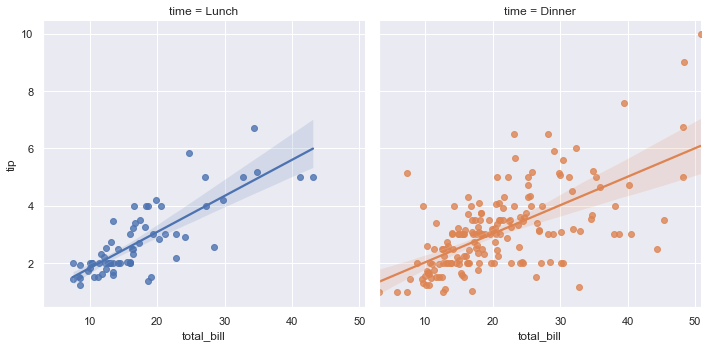

In [21]:
plt.figure(figsize=(10,10))
sns.lmplot(x="total_bill", y="tip", hue="time", col="time", data=data)
               #palette=pal, y_jitter=.02, logistic=True, truncate=False, col="sex")
plt.show()
    
  

<Figure size 864x864 with 0 Axes>

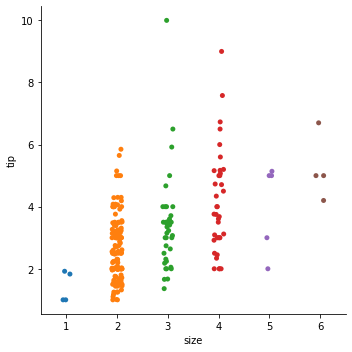

In [13]:
# Graficamos la pripina en relación con el "tamaño de la mesa"
plt.figure(figsize=(12,12))
sns.catplot(data=data, x='size',y='tip')
plt.show()

In [24]:
data[['size','tip']].groupby(by='size').mean()

,tip
size,
1,1.437500
2,2.582308
3,3.393158
4,4.135405
5,4.028000
6,5.225000


ValueError: Could not interpret input 'size'

<Figure size 864x864 with 0 Axes>

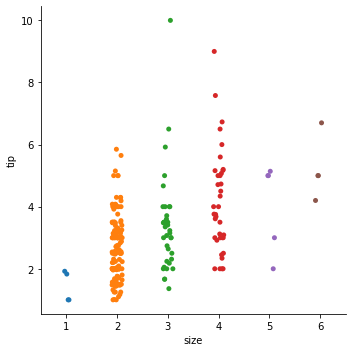

In [25]:
# Graficamos la pripina en relación con el "tamaño de la mesa"
plt.figure(figsize=(12,12))
sns.catplot(data=data, x='size',y='tip')
sns.lineplot(data=data[['size','tip']].groupby(by='size').mean(),x=,y='tip')
plt.show()

In [36]:
df = data[['size','tip']].groupby(by='size').mean()

In [43]:
df.columns

Index(['tip'], dtype='object')

In [44]:
from pandas_profiling import ProfileReport

In [45]:
ProfileReport(df=data)